# Load Dataset

In [17]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading in dataset
file_path = 'C:/Users/prian/OneDrive/Desktop/Classes/FDS/HW1/listings_new_york_2024.csv'
df = pd.read_csv(file_path)

#show first few rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,NaN,30,49,2022-06-21,0.28,3,300,0,NaN
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.04,2,365,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,65.0,30,247,2024-03-06,1.38,1,212,2,NaN


# Preliminary Data Exploration

In [18]:
#check shape
df.shape

#display data types
df.dtypes

#convert any necessary columns
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

#summary statistics for columns
df.describe()

#find out categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#count unique values and calculate first and second mode
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"First Mode: {df[col].mode()[0]} (Frequency: {df[col].value_counts().iloc[0]})")
    if len(df[col].mode()) > 1:
        print(f"Second Mode: {df[col].mode()[1]} (Frequency: {df[col].value_counts().iloc[1]})")
    print()



Column: name
Unique values: 36050
First Mode: Water View King Bed Hotel Room (Frequency: 30)

Column: host_name
Unique values: 8534
First Mode: Blueground (Frequency: 842)

Column: neighbourhood_group
Unique values: 5
First Mode: Manhattan (Frequency: 16715)

Column: neighbourhood
Unique values: 225
First Mode: Bedford-Stuyvesant (Frequency: 2709)

Column: room_type
Unique values: 4
First Mode: Entire home/apt (Frequency: 20023)

Column: license
Unique values: 1732
First Mode: Exempt (Frequency: 2872)



# Data Quality Report

In [19]:
#calculate % of missing value
missing_data = df.isnull().mean() * 100
missing_data[missing_data > 0].sort_values(ascending=False)

#identify outliers with IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#find outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers[['price']]

,price
24,500.0
52,900.0
58,750.0
65,500.0
140,800.0
...,...
37730,600.0
37739,1200.0
37751,3000.0
37759,788.0


# Handeling Incorrect Data

In [20]:
#dropping columns with alot of missing data
threshold = 0.5  #you can adjust the threshold as needed
df_cleaned = df.dropna(thresh=df.shape[0] * threshold, axis=1)

#impute missing numerical data with medians
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

#impute missing categorical data with mode
categorical_columns = df_cleaned.select_dtypes(include=[object]).columns
for col in categorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

#display first few rows
df_cleaned.head()


C:\Users\prian\AppData\Local\Temp\ipykernel_41324\2628204898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())
C:\Users\prian\AppData\Local\Temp\ipykernel_41324\2628204898.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150.0,30,49,2022-06-21,0.28,3,300,0
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.04,2,365,0
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,65.0,30,247,2024-03-06,1.38,1,212,2


# Data Exploration

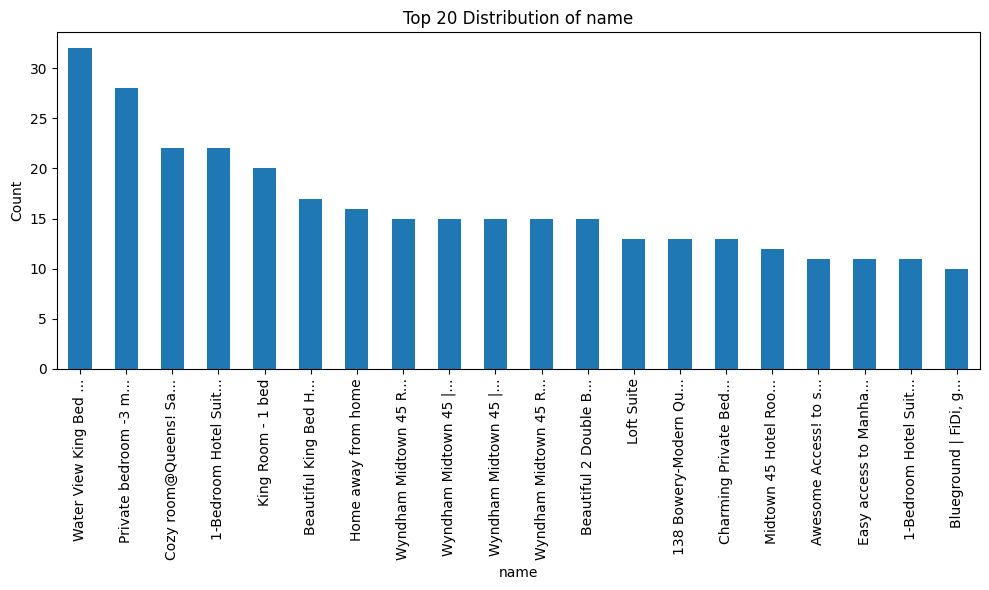

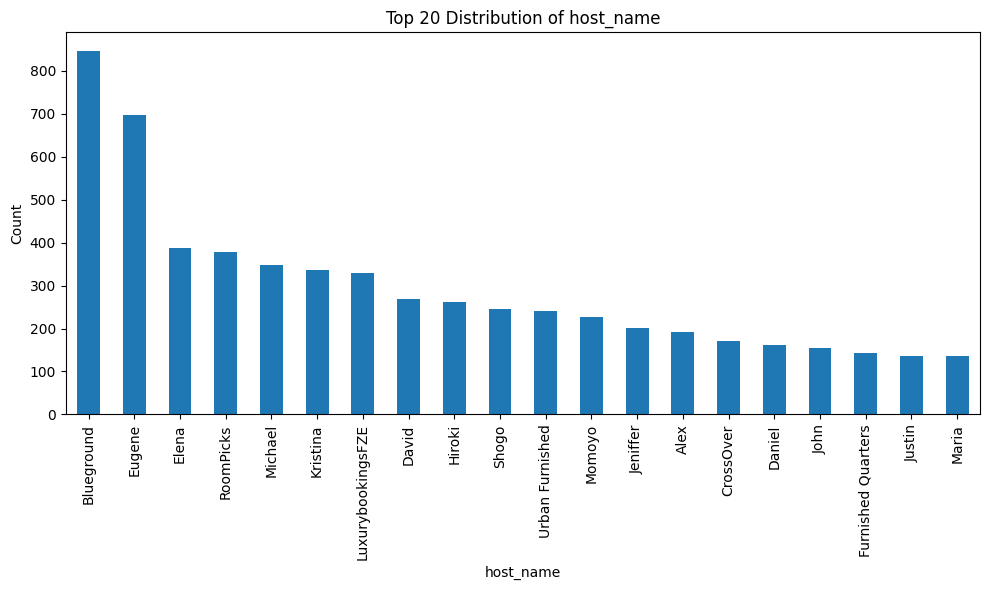

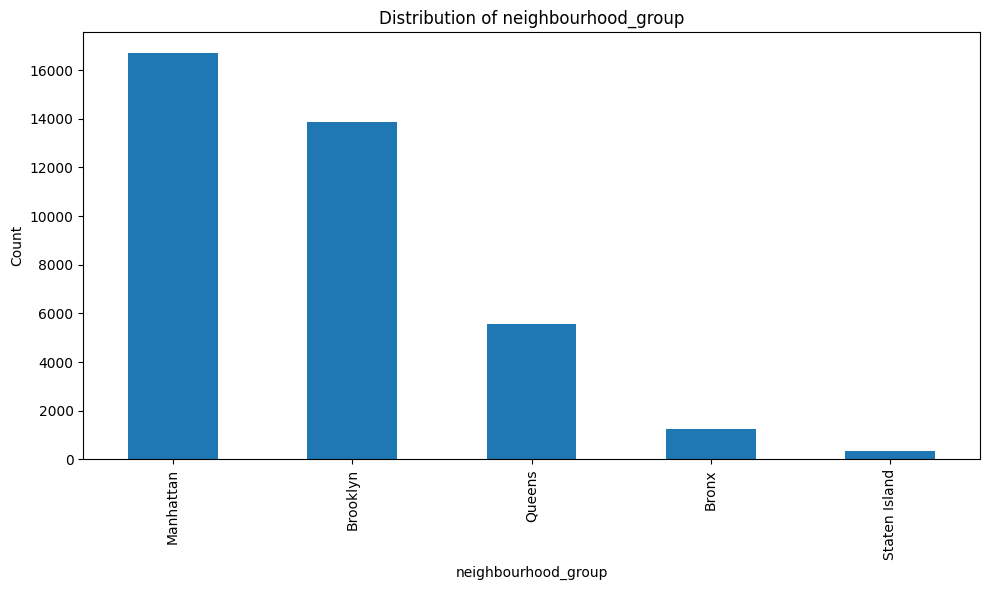

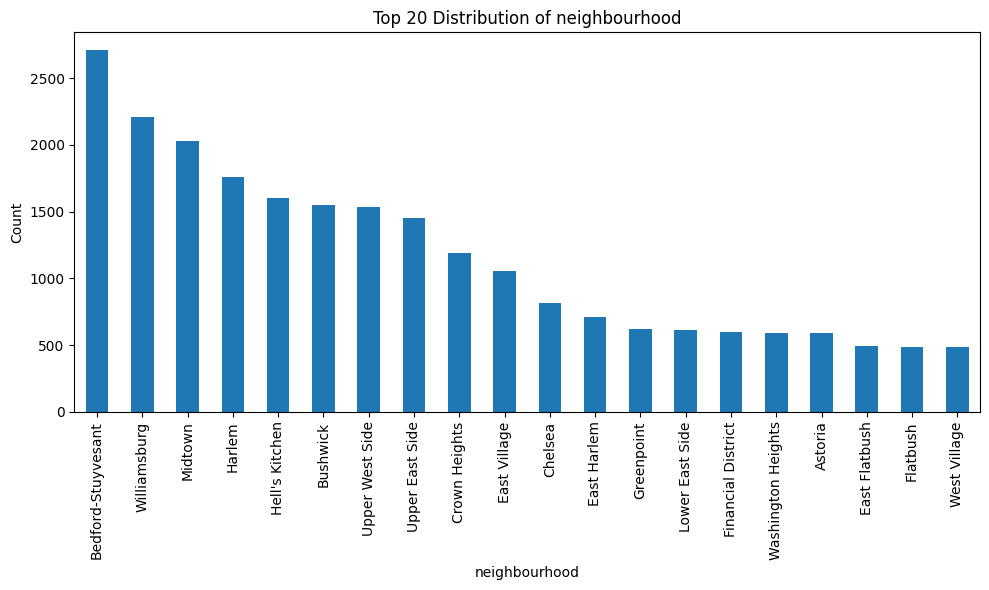

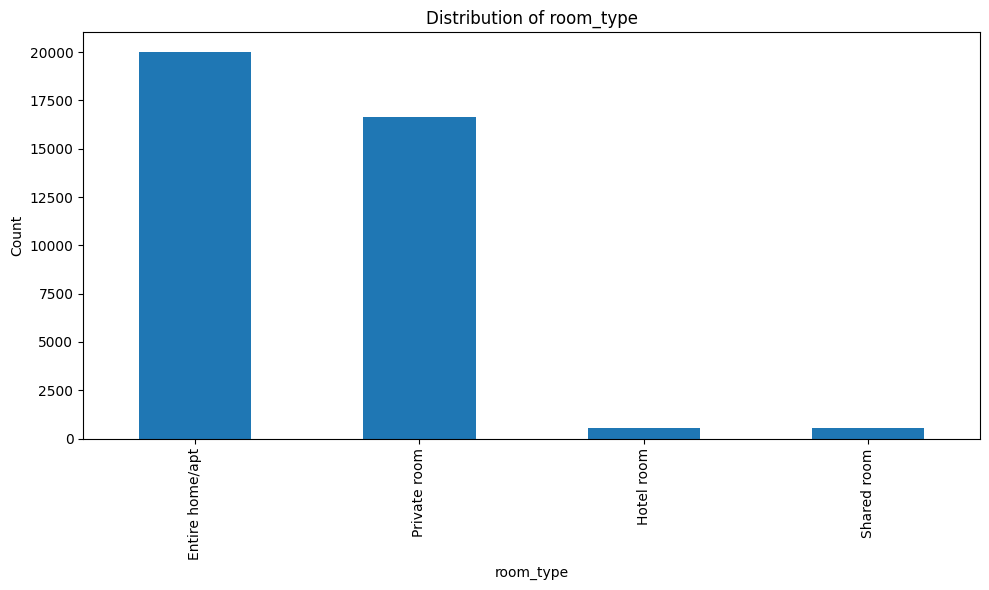

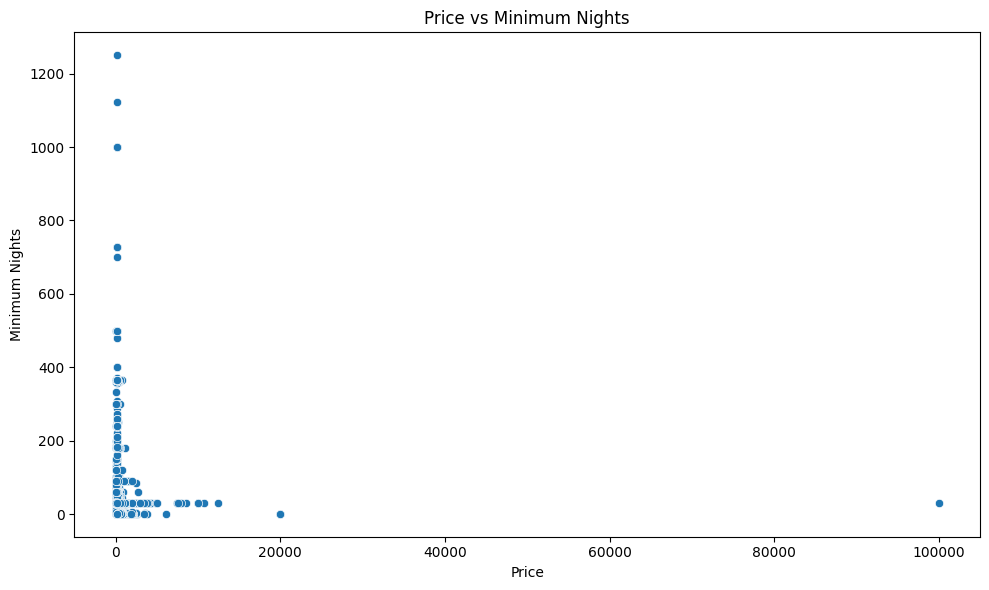

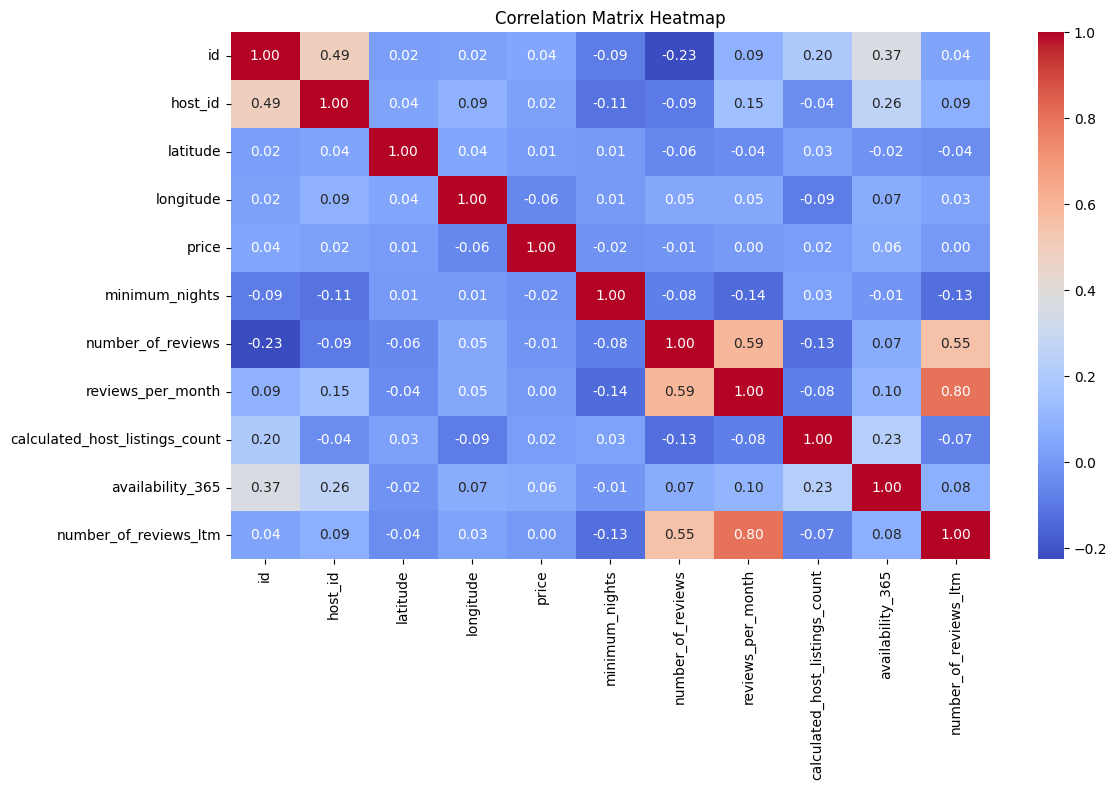

In [24]:
categorical_columns = df_cleaned.select_dtypes(include=[object]).columns

#impute missing numerical data with medians
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned.loc[:, numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

#impute missing categorical data with mode
for col in categorical_columns:
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

#plot bar
for col in categorical_columns:
    unique_vals = df_cleaned[col].nunique()
    plt.figure(figsize=(10, 6))
    
    if unique_vals > 20:  #display top 20 most frequent categories
        top_20 = df_cleaned[col].value_counts().nlargest(20)
        top_20.index = [label[:20] + '...' if len(label) > 20 else label for label in top_20.index]  #Needed to truncate long labels
        top_20.plot(kind='bar')
        plt.title(f'Top 20 Distribution of {col}')
    else:
        counts = df_cleaned[col].value_counts()
        counts.index = [label[:20] + '...' if len(label) > 20 else label for label in counts.index]
        counts.plot(kind='bar')
        plt.title(f'Distribution of {col}')
    
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='center')  #rotated to 90 for clarity
    plt.tight_layout()  #need to prevent label overlap
    plt.show()

#scatter plot
if 'price' in df_cleaned.columns and 'minimum_nights' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x='price', y='minimum_nights')
    plt.title('Price vs Minimum Nights')
    plt.xlabel('Price')
    plt.ylabel('Minimum Nights')
    plt.tight_layout()  
    plt.show()
else:
    print("Columns 'price' and/or 'minimum_nights' not found in the DataFrame.")

#visualize correlation matrix
corr_matrix = df_cleaned[numeric_columns].corr()  # Ensure only numeric columns are used

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


Final Summary

In [15]:
#final summary of the cleaned dataset
df_cleaned.info()

#display final number of rows and columns
df_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              37765 non-null  int64         
 1   name                            37765 non-null  object        
 2   host_id                         37765 non-null  int64         
 3   host_name                       37765 non-null  object        
 4   neighbourhood_group             37765 non-null  object        
 5   neighbourhood                   37765 non-null  object        
 6   latitude                        37765 non-null  float64       
 7   longitude                       37765 non-null  float64       
 8   room_type                       37765 non-null  object        
 9   price                           37765 non-null  float64       
 10  minimum_nights                  37765 non-null  int64         
 11  nu

(37765, 17)

# **Answer Questions**

1. What is the distribution of property prices across different neighborhoods?
   1. The distribution of property prices varies, some have higher avg price with location.
   2. Tibeca stands out as the most epxensive neighborhood at a median aound $400.
   3. Flatrion Distict and Fort Wadsworth seem to be the lowerst median proces with the neighborhoods being around $100 - $150.

2. How does the room type (Entire home/apt, Private room, etc.) affect the price? Are certain room types consistently more ex-pensive?
   1. Room type effects thr prices, **Entire Homes or Apartments** are consistently more expensive than Private and shared rooms. On the other hand, Hotel Rooms prices range further than entrire home/apt prices.

3. What is the correlation between the number of reviews and the availability of listings (availability_365)? Do listings with more reviews tend to be less available?
    1. The correlation between number of reviews and availability is 0.068. This indicates a weak positive correlation.
    2. Listings with more reviews are slighly more likely to have higher availabilites. BUT this since its a weak correlation this may not necessarily be the case.

4. Are there any outliers in the price or minimum night stays? How do they compare to typical listings?
   1. There are 1884 outliers in the price and 1083 outliers in the minmum nights stays.
   2. COmpared tothe typical listing outliers skew distributions and might not represent the the majority oflistings.

5. How do hosts with multiple listings compare to those with a single listing in terms of reviews, pricing, and availability?
   1. Number of Reviews: Hosts with single listings tend to have more reviews on avg (26.87 reviews) compared to hosts with multiple listings (22.93 reviews).
   2. Pricing: HOsts with multiple listings tent to have higher prives on avg compared to hosts with single listings. ($207.25 vs $179.49)
   3. Availability: Hosts with multiple listings tend to have higher availabilities (204.88 days on avg) compared to sinlg listings (99.33 days on avg).


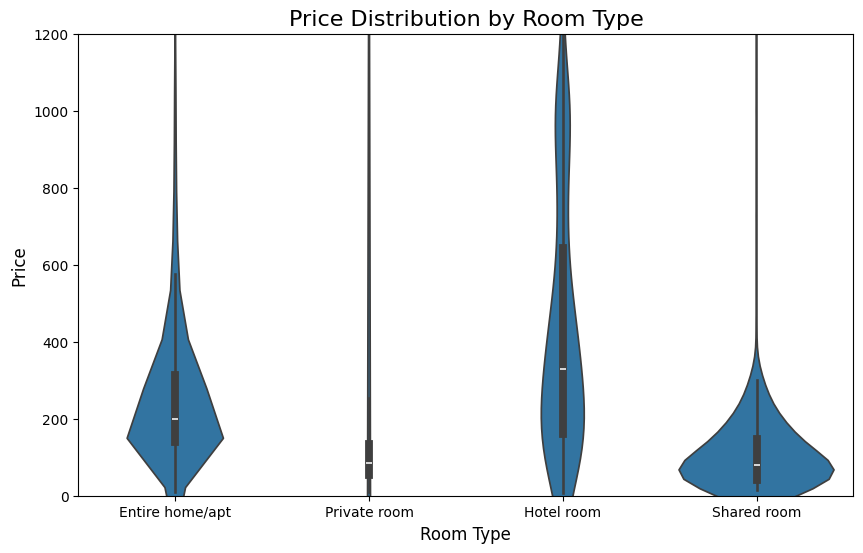

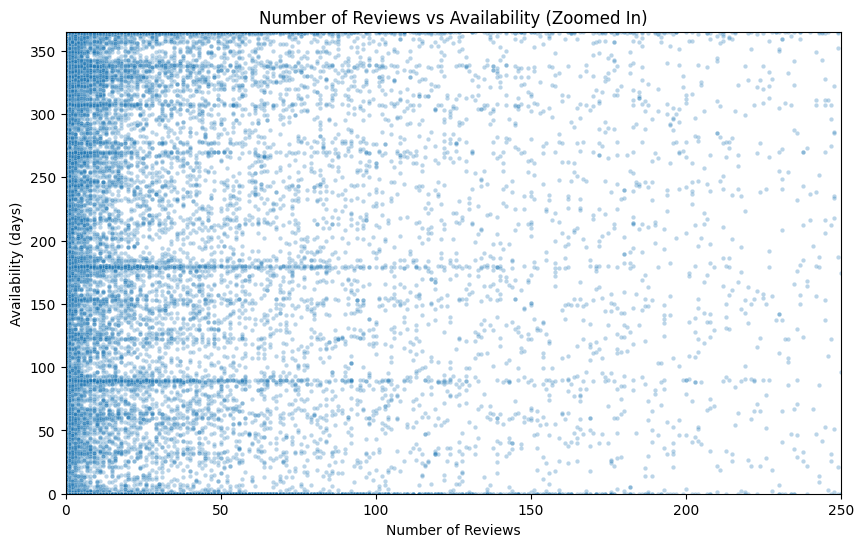

Correlation matrix between number of reviews and availability (365 days):
                    number_of_reviews  availability_365
number_of_reviews           1.000000          0.068199
availability_365            0.068199          1.000000
Number of Price Outliers: 1884
Number of Minimum Nights Outliers: 1083

Mean values for multiple listings:
price                207.245327
number_of_reviews     22.926185
availability_365     204.879375
dtype: float64

Mean values for single listings:
price                179.490042
number_of_reviews     26.872299
availability_365      99.929926
dtype: float64


In [34]:
#trying out a violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=df)

plt.title('Price Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.ylim(0, 1200)

plt.show()

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned[(df_cleaned['number_of_reviews'] <= 250)], 
                x='number_of_reviews', 
                y='availability_365', 
                alpha=0.3,  #reduceses opacity
                s=10)  #smaller size

plt.title('Number of Reviews vs Availability (Zoomed In)')
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (days)')
plt.ylim(0, 365)  #limit y-axis
plt.xlim(0, 250)  #limit x-axis
plt.show()


#calculate correlation between number of reviews and availability_365
correlation = df_cleaned[['number_of_reviews', 'availability_365']].corr()
print("Correlation matrix between number of reviews and availability (365 days):\n", correlation)

#identify outliers in 'price' and 'minimum_nights'
upper_bound = df_cleaned['price'].quantile(0.95)

#filter outliers in price
price_outliers = df_cleaned[df_cleaned['price'] > upper_bound]

#outliers in minimum_nights
min_nights_outliers = df_cleaned[df_cleaned['minimum_nights'] > df_cleaned['minimum_nights'].quantile(0.95)]

print(f'Number of Price Outliers: {len(price_outliers)}')
print(f'Number of Minimum Nights Outliers: {len(min_nights_outliers)}')

#group by host_id to compare multiple listings vs single listings
host_listing_counts = df_cleaned.groupby('host_id').size()

#separate multiple listings and single listings
multiple_listings = df_cleaned[df_cleaned['host_id'].isin(host_listing_counts[host_listing_counts > 1].index)]
single_listing = df_cleaned[df_cleaned['host_id'].isin(host_listing_counts[host_listing_counts == 1].index)]

#sompare reviews, pricing, and availability for multiple listings and single listings
print("\nMean values for multiple listings:")
print(multiple_listings[['price', 'number_of_reviews', 'availability_365']].mean())

print("\nMean values for single listings:")
print(single_listing[['price', 'number_of_reviews', 'availability_365']].mean())
